# FIFA Football World Cup
Football/Soccer World Cup history from 1930 to 2018, all matches

Dataset from : https://www.kaggle.com/datasets/piterfm/fifa-football-world-cup

The dataset contains information about all the World Cups.
* `matches_1930_2018.csv` - all match results from 1930 to 2018.
* `world_cup.csv` - basic World Cup information.

### Importing libraries & data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [2]:
world_cup = pd.read_csv("datasets/world_cup.csv")
matches = pd.read_csv("datasets/matches_1930_2018.csv")

### Inspecting Datasets

In [3]:
world_cup.head()

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,NaN,NaN,NaN,0,0,0
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64


In [4]:
world_cup.drop(0, axis=0, inplace =True)
world_cup.head()

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64
5,2002,"Korea Republic, Japan",32,Brazil,Germany,Ronaldo - 8,2705337,42271,64


In [5]:
world_cup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           21 non-null     int64 
 1   Host           21 non-null     object
 2   Teams          21 non-null     int64 
 3   Champion       21 non-null     object
 4   Runner-Up      21 non-null     object
 5   TopScorrer     21 non-null     object
 6   Attendance     21 non-null     int64 
 7   AttendanceAvg  21 non-null     int64 
 8   Matches        21 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 1.6+ KB


In [6]:
matches.head()


,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,Attendance,Venue,Officials,Date,Score,Referee,Notes,Round,Host,Year
0,France,Croatia,4,1.1,NaN,2,1.1,NaN,Didier Deschamps,Hugo Lloris,...,78011,"Olimpiyskiy stadion Luzhniki, Moskva",Néstor Pitana (Referee) · Hernán Maidana (AR1)...,2018-07-15,4–2,Néstor Pitana,NaN,Final,Russia,2018
1,Belgium,England,2,1.5,NaN,0,1.0,NaN,Roberto Martínez,Eden Hazard,...,64406,"Gazprom Arena, Sankt-Petersburg",Alireza Faghani (Referee) · Reza Sokhandan (AR...,2018-07-14,2–0,Alireza Faghani,NaN,Third-place match,Russia,2018
2,Croatia,England,2,1.7,NaN,1,0.6,NaN,Zlatko Dalić,Luka Modrić,...,78011,"Olimpiyskiy stadion Luzhniki, Moskva",Cüneyt Çakιr (Referee) · Bahattin Duran (AR1) ...,2018-07-11,2–1,Cüneyt Çakιr,Required Extra Time,Semi-finals,Russia,2018
3,France,Belgium,1,1.7,NaN,0,0.4,NaN,Didier Deschamps,Hugo Lloris,...,64286,"Gazprom Arena, Sankt-Petersburg",Andrés Cunha (Referee) · Nicolás Tarán (AR1) ·...,2018-07-10,1–0,Andrés Cunha,NaN,Semi-finals,Russia,2018
4,Sweden,England,0,0.5,NaN,2,1.0,NaN,Janne Andersson,Andreas Granqvist,...,39991,"Cosmos Arena, Samara",Björn Kuipers (Referee) · Sander van Roekel (A...,2018-07-07,0–2,Björn Kuipers,NaN,Quarter-finals,Russia,2018


In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   home_team     900 non-null    object 
 1   away_team     900 non-null    object 
 2   home_score    900 non-null    int64  
 3   home_xg       64 non-null     float64
 4   home_penalty  30 non-null     float64
 5   away_score    900 non-null    int64  
 6   away_xg       64 non-null     float64
 7   away_penalty  30 non-null     float64
 8   home_manager  900 non-null    object 
 9   home_captain  580 non-null    object 
 10  away_manager  900 non-null    object 
 11  away_captain  580 non-null    object 
 12  home_goals    738 non-null    object 
 13  away_goals    617 non-null    object 
 14  Attendance    900 non-null    int64  
 15  Venue         900 non-null    object 
 16  Officials     645 non-null    object 
 17  Date          900 non-null    object 
 18  Score         900 non-null    

### Data Cleaning & Manipulation

In [8]:
world_cup[world_cup.isnull().any(axis=1)].reset_index(drop=True)

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches


In [9]:
matches[matches.isnull().any(axis=1)].reset_index(drop=True)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,Attendance,Venue,Officials,Date,Score,Referee,Notes,Round,Host,Year
0,France,Croatia,4,1.1,NaN,2,1.1,NaN,Didier Deschamps,Hugo Lloris,...,78011,"Olimpiyskiy stadion Luzhniki, Moskva",Néstor Pitana (Referee) · Hernán Maidana (AR1)...,2018-07-15,4–2,Néstor Pitana,NaN,Final,Russia,2018
1,Belgium,England,2,1.5,NaN,0,1.0,NaN,Roberto Martínez,Eden Hazard,...,64406,"Gazprom Arena, Sankt-Petersburg",Alireza Faghani (Referee) · Reza Sokhandan (AR...,2018-07-14,2–0,Alireza Faghani,NaN,Third-place match,Russia,2018
2,Croatia,England,2,1.7,NaN,1,0.6,NaN,Zlatko Dalić,Luka Modrić,...,78011,"Olimpiyskiy stadion Luzhniki, Moskva",Cüneyt Çakιr (Referee) · Bahattin Duran (AR1) ...,2018-07-11,2–1,Cüneyt Çakιr,Required Extra Time,Semi-finals,Russia,2018
3,France,Belgium,1,1.7,NaN,0,0.4,NaN,Didier Deschamps,Hugo Lloris,...,64286,"Gazprom Arena, Sankt-Petersburg",Andrés Cunha (Referee) · Nicolás Tarán (AR1) ·...,2018-07-10,1–0,Andrés Cunha,NaN,Semi-finals,Russia,2018
4,Sweden,England,0,0.5,NaN,2,1.0,NaN,Janne Andersson,Andreas Granqvist,...,39991,"Cosmos Arena, Samara",Björn Kuipers (Referee) · Sander van Roekel (A...,2018-07-07,0–2,Björn Kuipers,NaN,Quarter-finals,Russia,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,Argentina,France,1,NaN,NaN,0,NaN,NaN,Francisco Olazar,Manuel Ferreira,...,23409,"Parque Central, Montevideo",Gilberto Rego (Referee) · Ulises Saucedo (AR1)...,1930-07-15,1–0,Gilberto Rego,NaN,Group stage,Uruguay,1930
892,Yugoslavia,Brazil,2,NaN,NaN,1,NaN,NaN,Bosko Simonovic,Milutin Ivković,...,24059,"Parque Central, Montevideo",Anibal Tejada (Referee) · Ricardo Vallarino (A...,1930-07-14,2–1,Anibal Tejada,NaN,Group stage,Uruguay,1930
893,Romania,Peru,3,NaN,NaN,1,NaN,NaN,Octav Luchide,Emerich Vogl,...,2549,"Pocitos, Montevideo",Alberto Warnken (Referee) · Jean Langenus (AR1...,1930-07-14,3–1,Alberto Warnken,NaN,Group stage,Uruguay,1930
894,United States,Belgium,3,NaN,NaN,0,NaN,NaN,Bob Millar,Tom Florie,...,18346,"Parque Central, Montevideo",Jose Macias (Referee) · Francisco Mateucci (AR...,1930-07-13,3–0,Jose Macias,NaN,Group stage,Uruguay,1930


In [10]:
matches[['home_team','Attendance']]

,home_team,Attendance
0,France,78011
1,Belgium,64406
2,Croatia,78011
3,France,64286
4,Sweden,39991
...,...,...
895,Argentina,23409
896,Yugoslavia,24059
897,Romania,2549
898,United States,18346


 ### Data Analysis & Visualization
 

#### Most Number of World Cup Winning Title

In [11]:
winner = world_cup['Champion'].value_counts()
winner

Brazil          5
Italy           4
France          2
Germany         2
West Germany    2
Argentina       2
Uruguay         2
Spain           1
England         1
Name: Champion, dtype: int64

In [12]:
runner_up = world_cup['Runner-Up'].value_counts()
runner_up

Argentina         3
Netherlands       3
West Germany      3
Italy             2
Czechoslovakia    2
Hungary           2
Croatia           1
France            1
Germany           1
Brazil            1
Sweden            1
United States     1
Name: Runner-Up, dtype: int64

In [13]:
teams = pd.concat([winner, runner_up], axis=1)
teams.fillna(0, inplace=True)
teams = teams.astype(int)
teams

,Champion,Runner-Up
Brazil,5,1
Italy,4,2
France,2,1
Germany,2,1
West Germany,2,3
Argentina,2,3
Uruguay,2,0
Spain,1,0
England,1,0
Netherlands,0,3


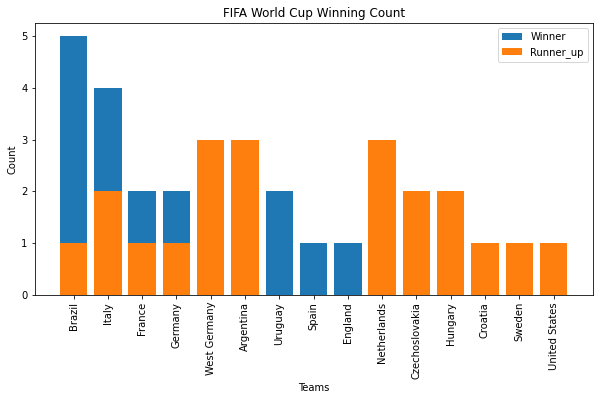

In [14]:
plt.figure(figsize=(10,5))
plt.bar(teams.index, teams["Champion"])
plt.bar(teams.index, teams["Runner-Up"])
plt.title('FIFA World Cup Winning Count')
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Count')
plt.legend(['Winner','Runner_up'])
plt.show()

#### Number of Goal Per Countary

In [15]:
goals= matches.groupby('home_team')[['home_score','away_score']].sum()
goals

,home_score,away_score
home_team,,
Algeria,5,10
Angola,0,1
Argentina,110,48
Australia,7,13
Austria,24,12
...,...,...
Uruguay,68,32
Wales,2,1
West Germany,77,30


In [16]:
goals['total_score'] = goals['home_score'] + goals['away_score']

In [17]:
goals = goals.sort_values(by='total_score', ascending=False)
goals

,home_score,away_score,total_score
home_team,,,
Brazil,182,69,251
Argentina,110,48,158
Italy,99,41,140
Germany,90,39,129
France,78,36,114
...,...,...,...
Serbia and Montenegro,0,1,1
Ukraine,1,0,1
Canada,0,1,1


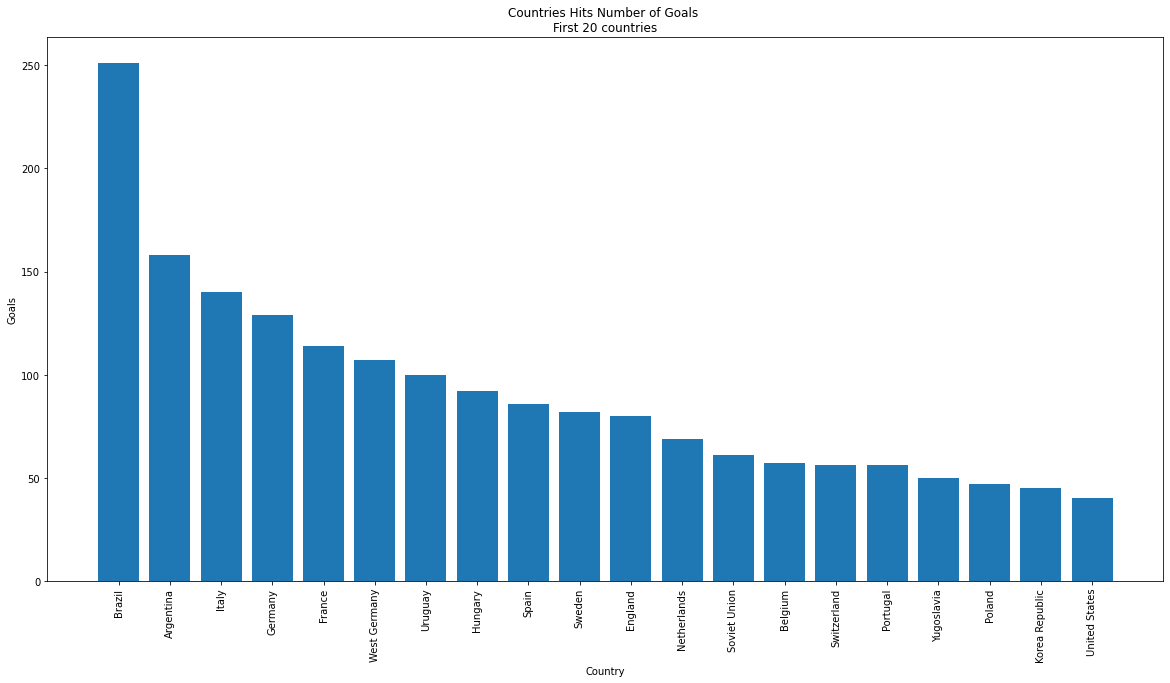

In [18]:
plt.figure(figsize=(20,10))   
plt.bar(goals.iloc[:20].index, goals.iloc[:20,2])
plt.title('Countries Hits Number of Goals \nFirst 20 countries')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Goals')
plt.show()

#### Attendance, Number of Teams, Goals, and Matches per Cup

In [19]:
# Subsetting home_score & away_score column per year
scores = matches.groupby('Year')[['home_score','away_score']].sum().sort_index(ascending=False)
scores['total_score'] = scores['home_score'] + scores['away_score']
scores

,home_score,away_score,total_score
Year,,,
2018,91,78,169
2014,81,90,171
2010,76,69,145
2006,86,61,147
2002,89,72,161
1998,98,73,171
1994,83,58,141
1990,67,48,115
1986,74,58,132


In [20]:
fifa_cups= world_cup.merge(scores, on = 'Year', how = 'inner')
# we are interested in some columns
fifa_cups= fifa_cups[['Year','Host','home_score','away_score','total_score','Teams','Matches','Attendance']].set_index('Year')
fifa_cups

,Host,home_score,away_score,total_score,Teams,Matches,Attendance
Year,,,,,,,
2018,Russia,91,78,169,32,64,3031768
2014,Brazil,81,90,171,32,64,3429873
2010,South Africa,76,69,145,32,64,3178856
2006,Germany,86,61,147,32,64,3352605
2002,"Korea Republic, Japan",89,72,161,32,64,2705337
1998,France,98,73,171,32,64,2903477
1994,United States,83,58,141,24,52,3587538
1990,Italy,67,48,115,24,52,2516215
1986,Mexico,74,58,132,24,52,2394031


Text(0.5, 1.0, 'Matches Plyed Scored by Teams Per Year')

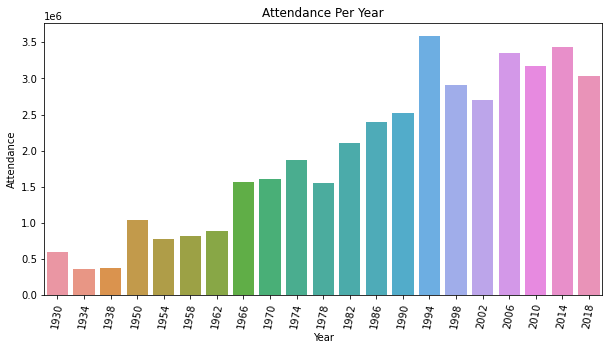

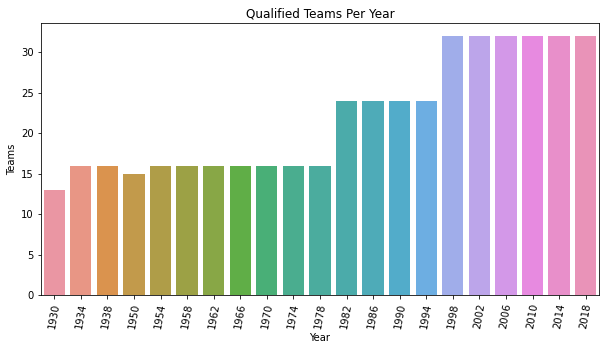

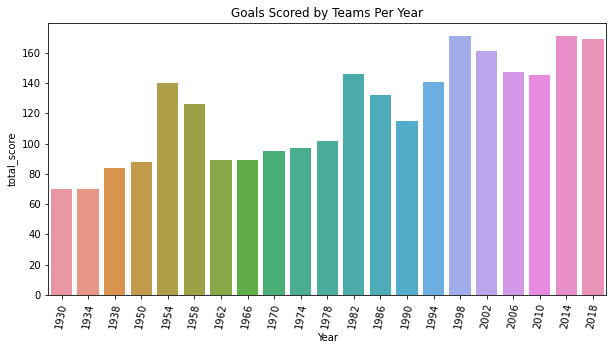

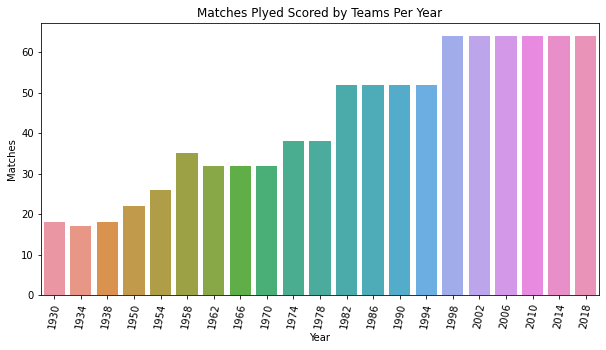

In [21]:
fig, ax = plt.subplots(figsize = (10,5))
g = sns.barplot(x = fifa_cups.index, y = 'Attendance', data = fifa_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Attendance Per Year')

fig, ax = plt.subplots(figsize = (10,5))
g = sns.barplot(x = fifa_cups.index, y = 'Teams', data = fifa_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Qualified Teams Per Year')

fig, ax = plt.subplots(figsize = (10,5))
g = sns.barplot(x = fifa_cups.index, y = 'total_score', data = fifa_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Goals Scored by Teams Per Year')

fig, ax = plt.subplots(figsize = (10,5))
g = sns.barplot(x = fifa_cups.index, y = 'Matches', data = fifa_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Matches Plyed Scored by Teams Per Year')


#### Goals Per Team Per World Cup

In [22]:
home_teams = matches[['home_team','home_score','Year']].groupby(['Year','home_team'])[['home_score']].sum()
home_teams

home_score
Year home_team              
1930 Argentina            16
     Brazil                4
     Chile                 4
     France                4
     Paraguay              1
...                      ...
2018 Spain                 3
     Sweden                2
     Switzerland           2
     Tunisia               1
     Uruguay               6

[398 rows x 1 columns]

In [23]:
away_teams = matches[['away_team','away_score','Year']].groupby(['Year','away_team'])[['away_score']].sum()
away_teams

away_score
Year away_team              
1930 Argentina             2
     Belgium               0
     Bolivia               0
     Brazil                1
     Chile                 1
...                      ...
2018 Spain                 4
     Sweden                4
     Switzerland           3
     Tunisia               4
     Uruguay               1

[440 rows x 1 columns]

In [24]:
goals=pd.concat([home_teams,away_teams],axis=1)
goals.fillna(0, inplace=True)
goals['total_score'] = goals['home_score'] + goals['away_score']
goals= goals.drop(['home_score','away_score'],axis= 1)

goals = goals.reset_index()
goals.columns = ['Year', 'Country', 'Goals']
goals = goals.sort_values(by = ['Year', 'Goals'], ascending = [False, False])
goals

,Year,Country,Goals
368,2018,Belgium,16.0
372,2018,Croatia,14.0
376,2018,France,14.0
375,2018,England,12.0
389,2018,Russia,11.0
...,...,...,...
5,1930,Romania,3.0
4,1930,Paraguay,1.0
401,1930,Peru,1.0
398,1930,Belgium,0.0


In [25]:
#Top 5 teams per goals per world cup
top5 = goals.groupby('Year').head(5)


In [26]:
years=set(top5.Year)
for year in years:
    top = top5[top5['Year']==year]
    print('\n')
    print(year)
    print(top)



1930
   Year        Country  Goals
0  1930      Argentina   18.0
7  1930        Uruguay   15.0
6  1930  United States    7.0
8  1930     Yugoslavia    7.0
1  1930         Brazil    5.0


1934
    Year         Country  Goals
13  1934           Italy   12.0
11  1934         Germany   11.0
10  1934  Czechoslovakia    9.0
9   1934         Austria    7.0
12  1934         Hungary    5.0


1938
    Year  Country  Goals
21  1938  Hungary   15.0
17  1938   Brazil   14.0
22  1938    Italy   11.0
23  1938   Sweden   11.0
18  1938     Cuba    5.0


1950
    Year     Country  Goals
25  1950      Brazil   22.0
33  1950     Uruguay   15.0
30  1950      Sweden   11.0
29  1950       Spain   10.0
34  1950  Yugoslavia    7.0


1954
    Year      Country  Goals
40  1954      Hungary   27.0
39  1954      Germany   25.0
35  1954      Austria   17.0
44  1954      Uruguay   16.0
42  1954  Switzerland   11.0


1958
    Year         Country  Goals
50  1958          France   23.0
47  1958          Brazil   16.

#### Matches With Highest Number Of Attendance

In [27]:
match_cups = matches[['Year','home_team', 'away_team','Date', 'Host', 'Venue','Attendance']].copy()
match_cups['match_teams'] = match_cups[['home_team','away_team']].apply(' vs '.join, axis=1)
match_cups.drop(['home_team','away_team'], axis=1, inplace=True)

# Matches with highest number of attandace for all cups
top_attend = match_cups.sort_values(by = 'Attendance', ascending = False)
top_attend.head(20)

,Year,Date,Host,Venue,Attendance,match_teams
826,1950,1950-07-16,Brazil,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filh...,173850,Uruguay vs Brazil
827,1950,1950-07-13,Brazil,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filh...,152772,Brazil vs Spain
836,1950,1950-07-01,Brazil,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filh...,142429,Brazil vs Yugoslavia
829,1950,1950-07-09,Brazil,Maracanï¿½ - Estï¿½dio Jornalista Mï¿½rio Filh...,138886,Brazil vs Sweden
519,1986,1986-06-07,Mexico,"Estadio Azteca, Mexico City",114600,Mexico vs Paraguay
488,1986,1986-06-29,Mexico,"Estadio Azteca, Mexico City",114600,Argentina vs West Germany
492,1986,1986-06-22,Mexico,"Estadio Azteca, Mexico City",114580,Argentina vs England
502,1986,1986-06-15,Mexico,"Estadio Azteca, Mexico City",114580,Mexico vs Bulgaria
491,1986,1986-06-25,Mexico,"Estadio Azteca, Mexico City",114500,Argentina vs Belgium
531,1986,1986-06-03,Mexico,"Estadio Azteca, Mexico City",110000,Belgium vs Mexico


In [28]:
# Matches with highest number of attandace per year (top 5)
top_attend_year = match_cups.sort_values(by = ['Year','Attendance'], ascending = [False,False])
top_attend_year= top_attend_year.groupby('Year').head(5)
top_attend_year.head(20)

,Year,Date,Host,Venue,Attendance,match_teams
0,2018,2018-07-15,Russia,"Olimpiyskiy stadion Luzhniki, Moskva",78011,France vs Croatia
2,2018,2018-07-11,Russia,"Olimpiyskiy stadion Luzhniki, Moskva",78011,Croatia vs England
12,2018,2018-07-01,Russia,"Olimpiyskiy stadion Luzhniki, Moskva",78011,Spain vs Russia
25,2018,2018-06-26,Russia,"Olimpiyskiy stadion Luzhniki, Moskva",78011,Denmark vs France
44,2018,2018-06-20,Russia,"Olimpiyskiy stadion Luzhniki, Moskva",78011,Portugal vs Morocco
64,2014,2014-07-13,Brazil,"Estadio Jornalista Mário Filho, Rio de Janeiro",74738,Germany vs Argentina
119,2014,2014-06-15,Brazil,"Estadio Jornalista Mário Filho, Rio de Janeiro",74738,Argentina vs Bosnia and Herzegovina
70,2014,2014-07-04,Brazil,"Estadio Jornalista Mário Filho, Rio de Janeiro",74240,France vs Germany
109,2014,2014-06-18,Brazil,"Estadio Jornalista Mário Filho, Rio de Janeiro",74101,Spain vs Chile
96,2014,2014-06-22,Brazil,"Estadio Jornalista Mário Filho, Rio de Janeiro",73819,Belgium vs Russia


In [29]:
years=set(top_attend_year.Year)
for year in years:
    top = top_attend_year[top_attend_year['Year']==year]
    print('\n')
    print(year)
    print(top)



1930
     Year        Date     Host                           Venue  Attendance  \
883  1930  1930-07-27  Uruguay  Estadio Centenario, Montevideo       79867   
884  1930  1930-07-26  Uruguay  Estadio Centenario, Montevideo       72886   
886  1930  1930-07-21  Uruguay  Estadio Centenario, Montevideo       70022   
882  1930  1930-07-30  Uruguay  Estadio Centenario, Montevideo       68346   
891  1930  1930-07-18  Uruguay  Estadio Centenario, Montevideo       57735   

                    match_teams  
883       Uruguay vs Yugoslavia  
884  Argentina vs United States  
886          Uruguay vs Romania  
882        Uruguay vs Argentina  
891             Uruguay vs Peru  


1934
     Year        Date   Host                     Venue  Attendance  \
865  1934  1934-06-10  Italy       Nazionale PNF, Rome       55000   
869  1934  1934-06-01  Italy  Giovanni Berta, Florence       43000   
868  1934  1934-06-03  Italy           San Siro, Milan       35000   
872  1934  1934-05-31  Italy  Gio

#### Which countries had won the cup ?

In [30]:
cup = world_cup[['Year','Host','Champion','Runner-Up']]
cup.set_index('Year', inplace = True)
cup

,Host,Champion,Runner-Up
Year,,,
2018,Russia,France,Croatia
2014,Brazil,Germany,Argentina
2010,South Africa,Spain,Netherlands
2006,Germany,Italy,France
2002,"Korea Republic, Japan",Brazil,Germany
1998,France,France,Brazil
1994,United States,Brazil,Italy
1990,Italy,West Germany,Argentina
1986,Mexico,Argentina,West Germany


In [31]:
for index, row in cup.iterrows():
    print(f' In the {index}, the champion is {row[1]}, and the runner-up is {row[2]}')

 In the 2018, the champion is France, and the runner-up is Croatia
 In the 2014, the champion is Germany, and the runner-up is Argentina
 In the 2010, the champion is Spain, and the runner-up is Netherlands
 In the 2006, the champion is Italy, and the runner-up is France
 In the 2002, the champion is Brazil, and the runner-up is Germany
 In the 1998, the champion is France, and the runner-up is Brazil
 In the 1994, the champion is Brazil, and the runner-up is Italy
 In the 1990, the champion is West Germany, and the runner-up is Argentina
 In the 1986, the champion is Argentina, and the runner-up is West Germany
 In the 1982, the champion is Italy, and the runner-up is West Germany
 In the 1978, the champion is Argentina, and the runner-up is Netherlands
 In the 1974, the champion is West Germany, and the runner-up is Netherlands
 In the 1970, the champion is Brazil, and the runner-up is Italy
 In the 1966, the champion is England, and the runner-up is West Germany
 In the 1962, the ch

## END